#Assignment 6

import Data

In [1]:
import networkx as nx # make sure networkx is installed (https://pypi.org/project/networkx/#description)
import matplotlib.pyplot as plt
import datetime
import csv
import random
import collections
import math
import numpy as np
from numpy import random
import random as rnd

In [92]:
Data = open('/content/lastfm_asia_edges.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

# G_lastfm = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))
G_lastfm = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int)

In [93]:
Data2 = open('/content/Twitch_ENGB_edges.csv', "r")
next(Data2, None)  # skip the first line in the input file
Graphtype = nx.Graph()

# G_twitch = nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))
G_twitch = nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype, nodetype=int)

Compute average node degree

In [4]:
#compute average degree
def average_degree(Graph):
  num_nodes = Graph.number_of_nodes()
  degrees = [val for (node, val) in Graph.degree()]
  average_degree = (sum(degrees)) / num_nodes
  return average_degree

In [5]:
lastfm_ave_deg = average_degree(G_lastfm)
print(lastfm_ave_deg)

twitch_ave_deg = average_degree(G_twitch)
print(twitch_ave_deg)

7.2943336831059815
9.914117316867808


Compute connectivity p

In [6]:
#compute connectivity p
p_lastfm = lastfm_ave_deg / (G_lastfm.number_of_nodes() - 1)
# p_lastfm = np.log(G_lastfm.number_of_nodes()) / (G_lastfm.number_of_nodes() - 1)
print(p_lastfm)

p_twitch = twitch_ave_deg / (G_twitch.number_of_nodes() - 1)
# p_twitch = np.log(G_twitch.number_of_nodes()) / (G_twitch.number_of_nodes() - 1)

print(p_twitch)

0.0009568849118596329
0.0013914550620165345


Compute average path length

In [94]:
# compute average path length
lastfm_ave_path = nx.average_shortest_path_length(G_lastfm)
print(lastfm_ave_path)

twitch_ave_path = nx.average_shortest_path_length(G_twitch)
print(twitch_ave_path)

5.232237268915701
3.6776157289097005


Compute global clustering coefficient

In [8]:
#compute clustering coefficient
lastfm_clustering = nx.average_clustering(G_lastfm)
print(lastfm_clustering)

twitch_clustering = nx.average_clustering(G_twitch)
print(twitch_clustering)

0.2194184243270858
0.13092821901472096


Create Simulated random graphs<br>
Add nodes then edges
(if this gets run twice it will continue adding!)

In [9]:
#create simulated random graphs
sim_G_lastfm = nx.Graph()
for i in range(G_lastfm.number_of_nodes()):
  sim_G_lastfm.add_node(i)

print(sim_G_lastfm.number_of_nodes())

sim_G_twitch = nx.Graph()
for i in range(G_twitch.number_of_nodes()):
  sim_G_twitch.add_node(i)
  
print(sim_G_twitch.number_of_nodes())

7624
7126


In [10]:
#add edges for sim graphs
for node in sim_G_lastfm.nodes():
    for node2 in sim_G_lastfm.nodes():
      if node2 >= node:
        random_num = random.rand()
        if random_num < p_lastfm:
          sim_G_lastfm.add_edge(node, node2)
    #handle disconnected graph
    if sim_G_lastfm.degree[node] == 0:
      random_node = rnd.choice(list(range(0, sim_G_lastfm.number_of_nodes())))
      sim_G_lastfm.add_edge(node, random_node)



for node in sim_G_twitch.nodes():
    for node2 in sim_G_twitch.nodes():
      if node2 >= node:
        random_num = random.rand()
        if random_num < p_twitch:
          sim_G_twitch.add_edge(node, node2)
    #handle disconnected graph
    if sim_G_twitch.degree[node] == 0:
      random_node = rnd.choice(list(range(0, sim_G_twitch.number_of_nodes())))
      sim_G_twitch.add_edge(node, random_node)

In [11]:
print(sim_G_lastfm.number_of_edges())
print(G_lastfm.number_of_edges())

print(sim_G_twitch.number_of_edges())
print(G_twitch.number_of_edges())

27829
27806
35236
35324


#Degree Distribution Plots for Problem 1

###Lastfm Real Degree Distribution
The real Lastfm network has a power law distribution for the node degrees

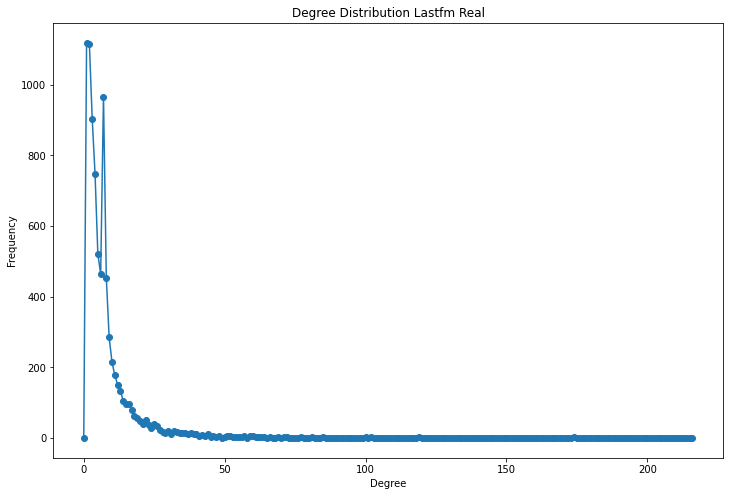

In [31]:
#degree distribution plot -- lastfm real
degree_freq = nx.degree_histogram(G_lastfm)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Lastfm Real')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.savefig("Lastfm_real.png")
plt.show()

###Lastfm Random Graph Simulated Degree Distribution
The simulated random graph for Lastfm does not follow a power law degree distribution as expected. instead there is a roughly gaussian distribution, with a mean in this case around 14. Notice also that the highest node degree is about 29 where it is over 200 in the real network.

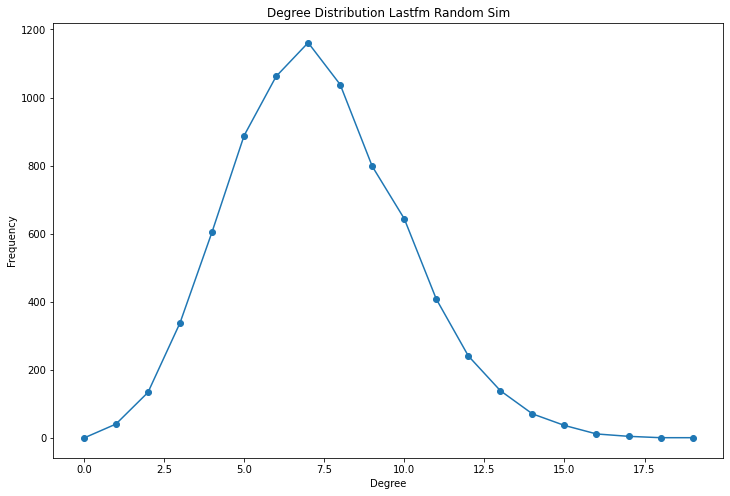

In [13]:
#degree distribution plot -- lastfm random sim
degree_freq = nx.degree_histogram(sim_G_lastfm)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Lastfm Random Sim')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

###Twitch Real Degree Distribution
The real Twitch network has a power law distribution for the node degrees

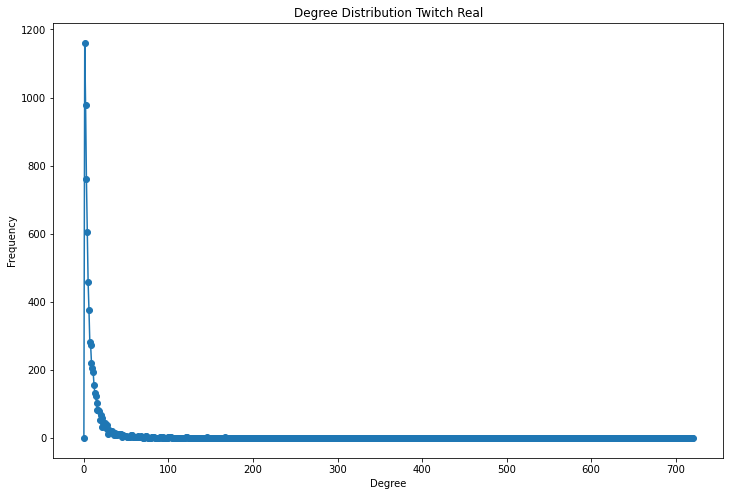

In [14]:
#degree distribution plot -- twitch real
degree_freq = nx.degree_histogram(G_twitch)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Twitch Real')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

###Twitch Random Graph Simulated Degree Distribution
The simulated random graph for Twitch does not follow a power law degree distribution as expected. instead there is a roughly gaussian distribution, with a mean in this case around 13. Notice also that the highest node degree is about 29 where it is over 700 in the real network.

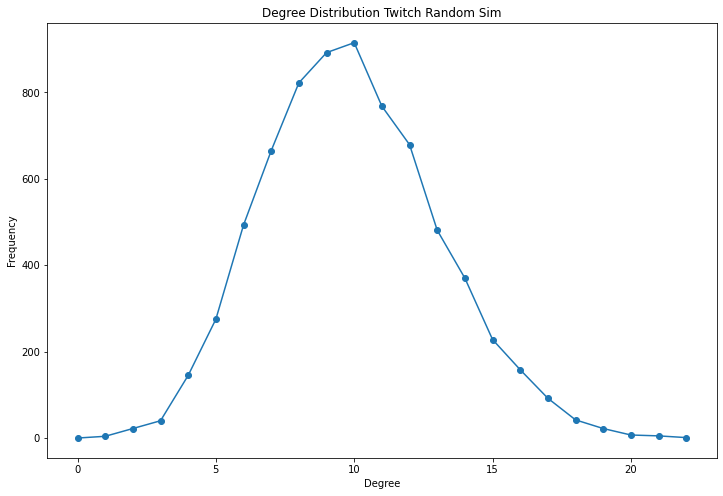

In [15]:
#degree distribution plot -- twitch random sim
degree_freq = nx.degree_histogram(sim_G_twitch)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Twitch Random Sim')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

###Computing Simulated Graph Measures

In [16]:
#avg degree

sim_lastfm_ave_deg = average_degree(sim_G_lastfm)
print(f'avg deg lastfm:  {sim_lastfm_ave_deg:.4f}')

sim_twitch_ave_deg = average_degree(sim_G_twitch)
print(f'avg deg twitch:  {sim_twitch_ave_deg:.4f}')

#compute average path length
sim_lastfm_ave_path = nx.average_shortest_path_length(sim_G_lastfm)
print(f'avg path lastfm:  {sim_lastfm_ave_path:.4f}')

sim_twitch_ave_path = nx.average_shortest_path_length(sim_G_twitch)
print(f'avg path twitch:  {sim_twitch_ave_path:.4f}')

#compute clustering coefficient
sim_lastfm_clustering = nx.average_clustering(sim_G_lastfm)
print(f'clustering coefficient lastfm:  {sim_lastfm_clustering:.4f}')

sim_twitch_clustering = nx.average_clustering(sim_G_twitch)
print(f'clustering coefficient twitch:  {sim_twitch_clustering:.4f}')

avg deg lastfm:  7.3004
avg deg twitch:  9.8894
avg path lastfm:  4.7246
avg path twitch:  4.1274
clustering coefficient lastfm:  0.0009
clustering coefficient twitch:  0.0013


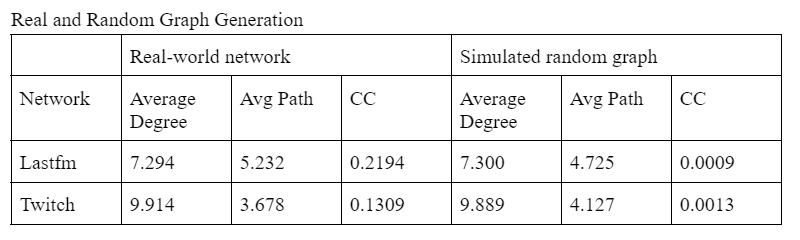

###Conclusions on Real vs Random Graph
The random graph produced quite similar average node degrees to the real networks. The random graph was also fairly close on average path length but not exact. The biggest difference in the quantitative measures was a significantly lower clustering coefficient.

In terms of the graphs, the random graphs have a roughly gaussian distribution of node degrees centered about on the mean of the average degree of the real graphs. Whereas, the real graphs follow a power law distribution for node degree.

#Problem 2
###Preferential Attachment Model

In [17]:
Data = open('/content/lastfm_asia_edges.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G_lastfm = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))

In [18]:
Data2 = open('/content/Twitch_ENGB_edges.csv', "r")
next(Data2, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G_twitch = nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))

In [19]:
#compute sum of degrees
def sum_degree(Graph):
  degrees = [val for (node, val) in Graph.degree()]
  total_deg = sum(degrees)
  return total_deg

In [20]:
#compute p weights for preferential attachment
def graph_prob(graph):
  degrees = [val for (node, val) in graph.degree()]
  probs = []
  sum_degrees = sum(degrees)
  for i in range(len(degrees)):
    degrees[i] = degrees[i]  / sum_degrees
  return degrees

In [21]:
import random as rnd
def preferential_attachment(graph):
  new_graph = graph
  

  t = 0.1 * new_graph.number_of_nodes()
  int_t = int(t)
  print(f'adding: {int_t} nodes')

  for i in range(int_t):
    new_graph.add_node(new_graph.number_of_nodes())
    weights = graph_prob(new_graph)

    while new_graph.degree[new_graph.number_of_nodes() - 1] < int(average_degree(graph)):
        random_node = rnd.choices(list(range(0, new_graph.number_of_nodes())), weights, k=1)
        new_graph.add_edge((new_graph.number_of_nodes() - 1), random_node[0])
 
  return new_graph

In [22]:
#create new preferential graphs
pref_lastfm = preferential_attachment(G_lastfm)
pref_twitch = preferential_attachment(G_twitch)

print(pref_lastfm.number_of_nodes())

adding: 762 nodes
adding: 712 nodes
8386


###Computing preferential attachment Graph Measures

In [23]:
#avg degree

pref_lastfm_ave_deg = average_degree(pref_lastfm)
print(f'avg deg lastfm:  {pref_lastfm_ave_deg:.4f}')

pref_twitch_ave_deg = average_degree(pref_twitch)
print(f'avg deg twitch:  {pref_twitch_ave_deg:.4f}')

#compute average path length
pref_lastfm_ave_path = nx.average_shortest_path_length(pref_lastfm)
print(f'avg path lastfm:  {pref_lastfm_ave_path:.4f}')

pref_twitch_ave_path = nx.average_shortest_path_length(pref_twitch)
print(f'avg path twitch:  {pref_twitch_ave_path:.4f}')

#compute clustering coefficient
pref_lastfm_clustering = nx.average_clustering(pref_lastfm)
print(f'clustering coefficient lastfm:  {pref_lastfm_clustering:.4f}')

pref_twitch_clustering = nx.average_clustering(pref_twitch)
print(f'clustering coefficient twitch:  {pref_twitch_clustering:.4f}')

avg deg lastfm:  7.9036
avg deg twitch:  10.8109
avg path lastfm:  4.8544
avg path twitch:  3.6382
clustering coefficient lastfm:  0.1661
clustering coefficient twitch:  0.0938


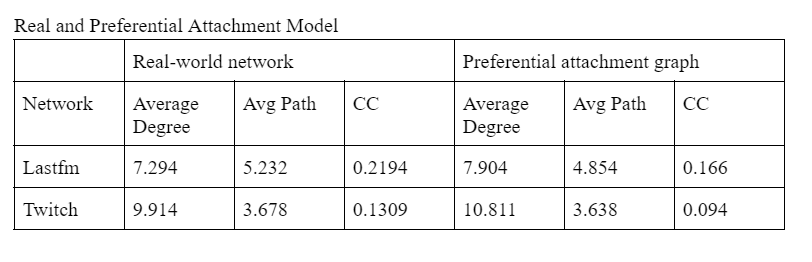

#Degree Distribution Plots for Problem 2

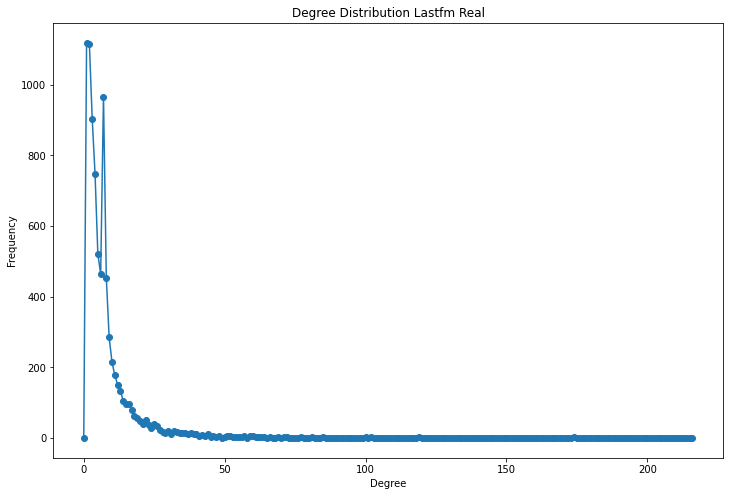

In [24]:
#degree distribution plot -- lastfm real
degree_freq = nx.degree_histogram(G_lastfm)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Lastfm Real')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

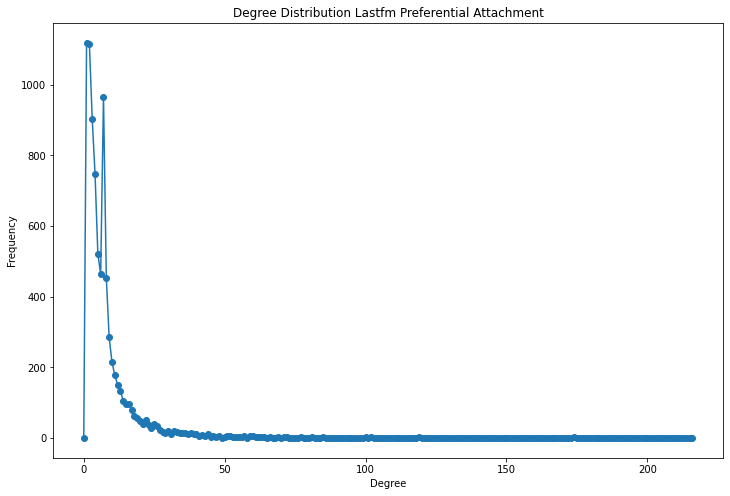

In [25]:
#degree distribution plot -- lastfm random sim
degree_freq = nx.degree_histogram(pref_lastfm)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Lastfm Preferential Attachment')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

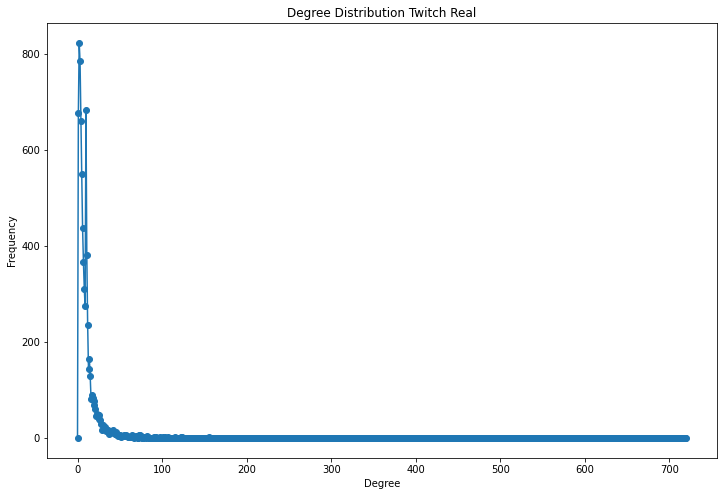

In [26]:
#degree distribution plot -- twitch real
degree_freq = nx.degree_histogram(G_twitch)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Twitch Real')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

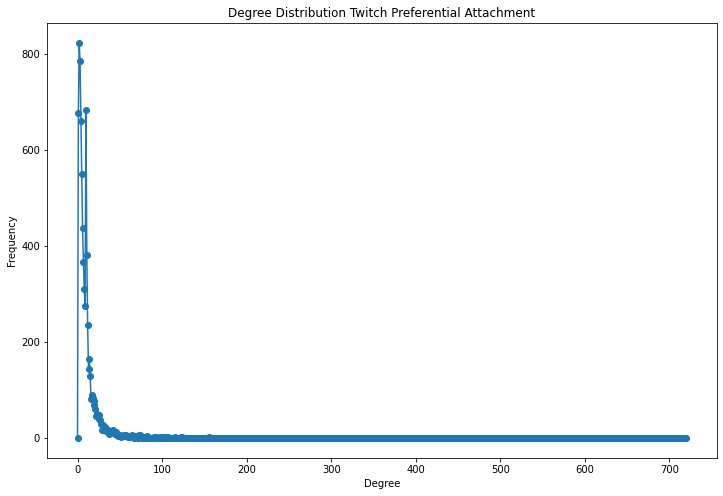

In [28]:
#degree distribution plot -- twitch random sim
degree_freq = nx.degree_histogram(pref_twitch)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Twitch Preferential Attachment')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

###Conclusions on Preferential Attachment
The Preferential attachment graphs also produced quite similar average node degrees to the real networks. The Preferential attachment appears to be even better at producing similar average shortest path lengths to the real networks. The clustering coefficients are still a little low for preferential attachment compared to the real networks but much closer than the random graph.

In terms of the graphs, the preferential attachment has a very similar appearance to the real networks. They follow the power law distribution and are almost indistinguishable at least for this chosen value of t addition.

#Bonus Problem
###Small World model

In [78]:
Data = open('/content/lastfm_asia_edges.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

# G_lastfm = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))
G_lastfm = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int)

In [79]:
Data2 = open('/content/Twitch_ENGB_edges.csv', "r")
next(Data2, None)  # skip the first line in the input file
Graphtype = nx.Graph()

# G_twitch = nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))
G_twitch = nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype, nodetype=int)

###Make regular ring lattice

In [80]:
#make ring lattice graph
ring_G_lastfm = nx.circulant_graph(G_lastfm.number_of_nodes(), [1, 2])

ring_G_twitch = nx.circulant_graph(G_twitch.number_of_nodes(), [1,2])

###Compute probability beta for each graph

In [81]:
#probability beta for each graph
lastfm_clustering = nx.average_clustering(G_lastfm)
ring_lastfm_clustering = nx.average_clustering(ring_G_lastfm)

beta_lastfm = 1 -  ((lastfm_clustering / ring_lastfm_clustering)**(1/3))

twitch_clustering = nx.average_clustering(G_twitch)
ring_twitch_clustering = nx.average_clustering(ring_G_twitch)

beta_twitch = 1 -  ((twitch_clustering / ring_twitch_clustering)**(1/3))

###Rewiring small world graph following algorithm 4.1

In [82]:
for node in ring_G_lastfm.nodes():
  edges2remove = [(start_node, end_node) for (start_node, end_node) in ring_G_lastfm.edges(node)]
  for (start_node2, end_node2) in edges2remove:
    random_node = rnd.choice(list(range(0, ring_G_lastfm.number_of_nodes())))

    if random_node != node:   #handle self loops
      if random_node != end_node2:    #handle rewiring same edge
        random_num = random.rand()
        if random_num <= beta_lastfm:
          ring_G_lastfm.add_edge(start_node2, random_node)
          ring_G_lastfm.remove_edge(start_node2, end_node2)

In [83]:
#handle disconnected graph situation
for node in ring_G_lastfm.nodes():
  if ring_G_lastfm.degree(node) < 1:
    random_node = rnd.choice(list(range(0, ring_G_lastfm.number_of_nodes())))
    ring_G_lastfm.add_edge(node, random_node)

In [84]:
for node in ring_G_twitch.nodes():
  edges2remove = [(start_node, end_node) for (start_node, end_node) in ring_G_twitch.edges(node)]
  for (start_node2, end_node2) in edges2remove:
    random_node = rnd.choice(list(range(0, ring_G_twitch.number_of_nodes())))

    if random_node != node:   #handle self loops
      if random_node != end_node2:    #handle rewiring same edge
        random_num = random.rand()
        if random_num <= beta_twitch:
          ring_G_twitch.add_edge(start_node2, random_node)
          ring_G_twitch.remove_edge(start_node2, end_node2)

In [85]:
#handle disconnected graph situation
for node in ring_G_twitch.nodes():
  if ring_G_twitch.degree(node) < 1:
    random_node = rnd.choice(list(range(0, ring_G_twitch.number_of_nodes())))
    ring_G_twitch.add_edge(node, random_node)

###Compute Measures for small world

In [86]:
small_lastfm_ave_deg = average_degree(ring_G_lastfm)
print(f'avg deg lastfm:  {small_lastfm_ave_deg:.4f}')

small_twitch_ave_deg = average_degree(ring_G_twitch)
print(f'avg deg twitch:  {small_twitch_ave_deg:.4f}')

#compute average path length
small_lastfm_ave_path = nx.average_shortest_path_length(ring_G_lastfm)
print(f'avg path lastfm:  {small_lastfm_ave_path:.4f}')

small_twitch_ave_path = nx.average_shortest_path_length(ring_G_twitch)
print(f'avg path twitch:  {small_twitch_ave_path:.4f}')

#compute clustering coefficient
small_lastfm_clustering = nx.average_clustering(ring_G_lastfm)
print(f'clustering coefficient lastfm:  {small_lastfm_clustering:.4f}')

small_twitch_clustering = nx.average_clustering(ring_G_twitch)
print(f'clustering coefficient twitch:  {small_twitch_clustering:.4f}')

avg deg lastfm:  4.0018
avg deg twitch:  4.0076
avg path lastfm:  7.4913
avg path twitch:  6.9750
clustering coefficient lastfm:  0.0998
clustering coefficient twitch:  0.0337


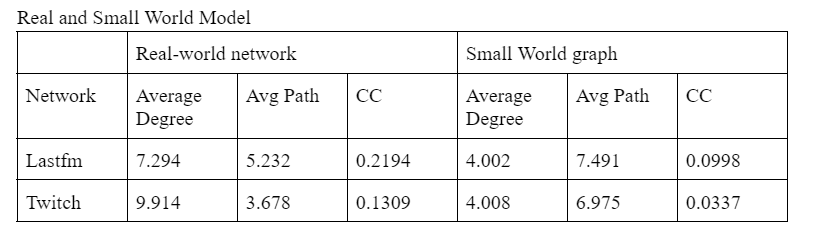


###Degree Distribuiton Graphs Real and Small World

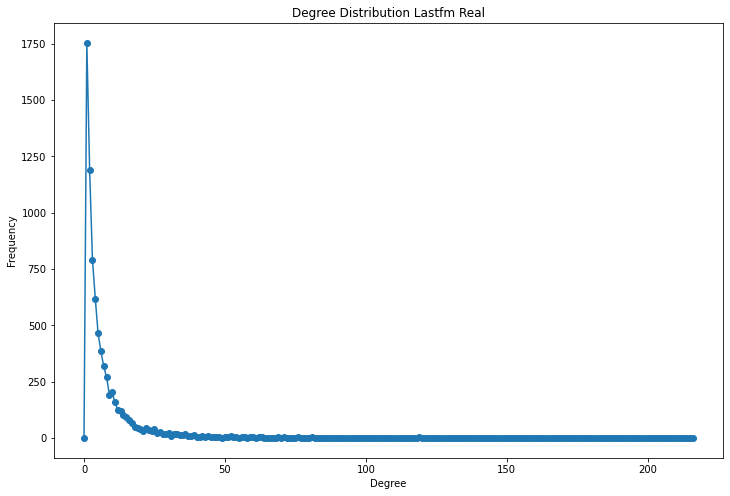

In [87]:
#degree distribution plot -- lastfm real
degree_freq = nx.degree_histogram(G_lastfm)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Lastfm Real')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

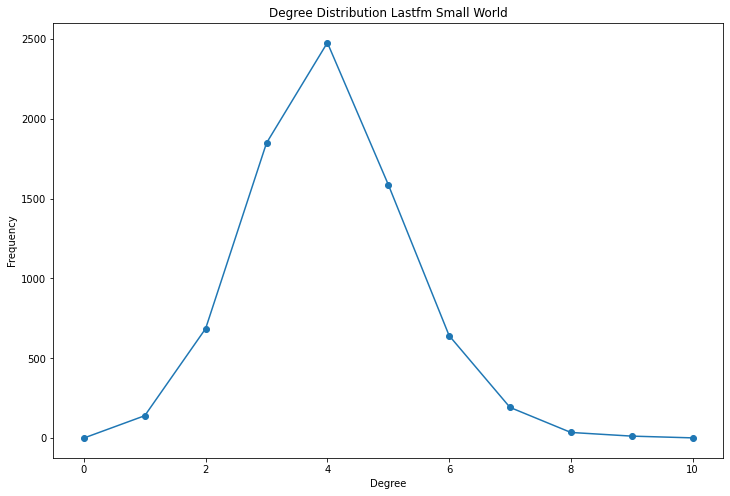

In [88]:
#degree distribution plot -- lastfm small world
degree_freq = nx.degree_histogram(ring_G_lastfm)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Lastfm Small World')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

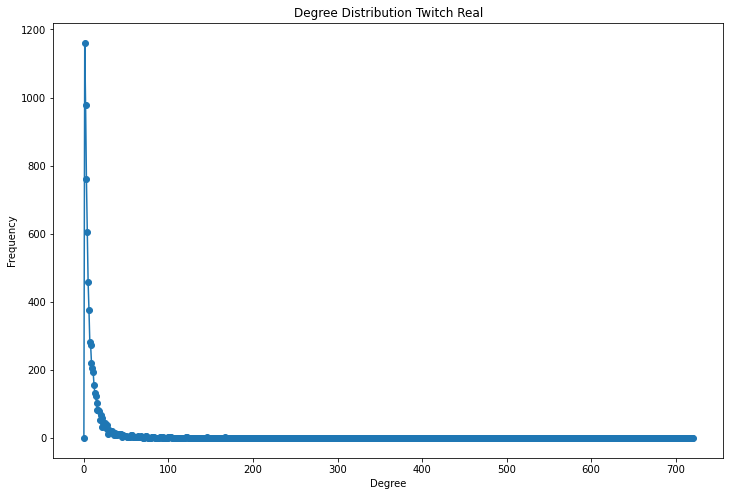

In [89]:
#degree distribution plot -- twitch real
degree_freq = nx.degree_histogram(G_twitch)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Twitch Real')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

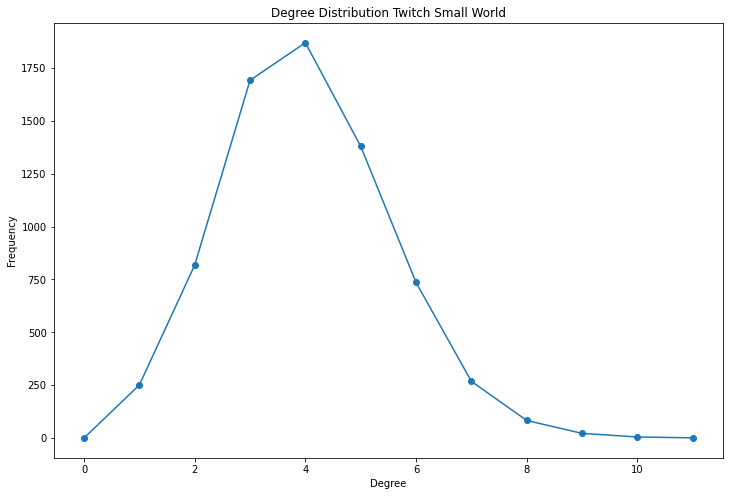

In [90]:
#degree distribution plot -- twitch small world
degree_freq = nx.degree_histogram(ring_G_twitch)
degrees = range(len(degree_freq))

plt.plot(degrees, degree_freq, 'o-')
plt.title('Degree Distribution Twitch Small World')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

###Conclusions on Small World Model
For the quantitative measures, the small world model produces average degrees significantly lower than the real networks. The average shortest path lengths of the small world models are a bit higher than the real networks. The clustering coefficients are a bit lower than the real networks but still much higher than for the random graph approach.

For the graphs, the small world models are maybe roughly gaussian around the mean of the average degree of the small world. They have a little bit of a long right tail. However, they do not follow the power law distribution like the real networks.

#Bonus Problem 2

For random graphs, the first phase transition happens when the average node degree is about 1. This is because the giant component has begun to arise and the average diameter is about at its maximum before it begins decreasing too much. These factors together mean that the path lengths will be long.

Before this point, you would observe small, isolated clusters and small diameters. This equates to short path lengths.

After the first phase transition, almost all nodes are connected and the diameter decreases fairly rapidly before flatting out. As a result, path lengths shorten.